# Conditional Parallel Assumption

In [539]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, log_loss
import sklearn
from matplotlib.pyplot import hist
import os
from xgboost import XGBClassifier, XGBRegressor

In [540]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [541]:
panel = pd.read_csv('2004_notadd_trimmed_new.csv')
print(panel)

       stkcd  year  province_code  city_code indcd   fixed_asset  staff  \
0          2  2000         440000   440300.0   K70  3.382824e+08   6616   
1          2  2001         440000   440300.0   K70  2.883114e+08   5349   
2          2  2002         440000   440300.0   K70  3.486585e+08   6055   
3          2  2003         440000   440300.0   K70  2.680249e+08   7025   
4          3  2000         440000   440300.0   S90  6.888027e+08   5446   
...      ...   ...            ...        ...   ...           ...    ...   
4217  600899  2000         330000   330100.0   I65  4.968695e+07    324   
4218  600899  2001         330000   330100.0   I65  6.187242e+07    323   
4219  600899  2002         330000   330100.0   I65  2.878101e+07    135   
4220  600899  2003         330000   330100.0   I65  2.793138e+07     85   
4221  600900  2003         110000   110000.0   D44  2.635965e+10   1634   

      tfp_acf01  lninvesta   lntasset  ...  tapr_win   roa_win  leverage  age  \
0     10.454041  1

# 2004

In [586]:
post_2003 = panel['year'].isin([2001,2002, 2003])
panel['post_2003']=post_2003

In [587]:
# make post_2004 type bool
panel['post_2003'] = panel['post_2003'].astype(bool)

In [588]:
panel = panel.groupby(['stkcd', 'post_2003']).mean()
panel = panel.reset_index(level='post_2003')
panel = panel[panel.index.duplicated(keep = False)]
panel

,post_2003,year,province_code,city_code,fixed_asset,staff,tfp_acf01,lninvesta,lntasset,lntdebt,tapr_win,roa_win,leverage,age,lnclr,unempro,unemployee,second_pro,treat_2004,post_2004
stkcd,,,,,,,,,,,,,,,,,,,,
13,False,2000.5,440000.0,440300.0,3.899357e+08,3404.0,9.176553,16.760997,21.136496,21.423037,-0.247439,-0.242713,1.627736,8.5,11.643698,1.460,18734.0,53.280000,0.0,0.0
13,True,2002.0,440000.0,440300.0,3.264140e+08,1516.0,9.451334,16.519981,20.423098,21.736691,-0.524325,-0.511600,3.719514,10.0,12.279851,1.410,19695.0,54.709999,0.0,0.0
405,False,2000.5,440000.0,440400.0,1.406279e+08,722.0,8.850142,13.536615,20.388743,19.932585,-0.310868,-0.309252,0.673499,8.5,12.771757,1.515,11343.5,55.410000,0.0,0.0
405,True,2002.0,440000.0,440400.0,8.192207e+07,115.0,7.739857,10.175345,19.762295,20.026012,-0.461338,-0.461338,1.301759,10.0,13.476348,1.500,11800.0,55.160000,0.0,0.0
526,False,2000.0,350000.0,350200.0,3.924497e+07,37.0,10.234362,10.433498,19.242420,17.981043,0.086413,0.073384,0.283264,8.0,13.874416,1.220,16039.0,52.799999,0.0,0.0
526,True,2003.0,350000.0,350200.0,8.607961e+07,58.0,7.038944,16.953306,19.154469,17.530375,0.003357,0.000588,0.197090,11.0,14.210340,1.330,18820.0,58.509998,0.0,0.0
542,False,2000.5,440000.0,441300.0,2.067156e+08,2150.5,10.382304,17.872723,21.078104,20.599896,0.055525,0.070397,0.625737,8.5,11.468131,0.425,11787.0,57.860000,0.0,0.0
542,True,2002.0,440000.0,441300.0,2.579023e+08,1876.0,12.069590,18.740456,22.315552,21.929594,0.212128,0.158652,0.679800,10.0,11.831202,0.500,14222.0,57.580002,0.0,0.0
568,False,2000.5,510000.0,510500.0,5.325626e+08,2638.5,9.437243,17.856355,21.462904,20.474897,0.082451,0.060866,0.373253,6.5,12.216323,0.460,21318.5,38.310001,0.0,0.0


In [589]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [590]:
# format this in a manner sympatico with ATT estimation
# compact_df contains only post_2004 data
compact_df = panel[~panel['post_2003']]

# calcuate change in TFP
lninvesta = panel['lninvesta'].values
compact_df['Y1-Y0'] = lninvesta[panel['post_2003']] - lninvesta[~panel['post_2003']]

# reset index so we have (1,2,3..)
compact_df = compact_df.reset_index()

# set outcome to Y1-Y0
outcome = compact_df['Y1-Y0']
treatment = compact_df['treat_2004'].astype(int)
confounders = compact_df[['lntasset', 'lntdebt', 'roa_win','age', 'unempro', 'second_pro']]
#compact_df.to_csv("compact.csv")

C:\Users\wenke\AppData\Local\Temp/ipykernel_19776/2816398820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_df['Y1-Y0'] = lninvesta[panel['post_2003']] - lninvesta[~panel['post_2003']]


In [591]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [592]:
# specify a model for the conditional expected outcome

# TODO(victorveitch) the covariates have basically no predictive power, replace this example with something better

# make a function that returns a sklearn model for later use in k-folding
def make_Q_model():
   #return LinearRegression()
   return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=3)
   # return GradientBoostingRegressor(random_state=RANDOM_SEED, n_estimators=200, max_depth=3)
#   return XGBRegressor(n_estimators=100, n_jobs=1, random_state= RANDOM_SEED)
Q_model = make_Q_model()

# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

X_train, X_test, y_train, y_test = train_test_split(X_w_treatment, outcome, test_size=0.2)
Q_model.fit(X_train, y_train)
y_pred = Q_model.predict(X_test)

test_mse=mean_squared_error(y_pred, y_test)
print(f"Test MSE of fit model {test_mse}") 
baseline_mse=mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
print(f"Test MSE of no-covariate model {baseline_mse}")

Test MSE of fit model 6.488957757015266
Test MSE of no-covariate model 4.595162138597686


In [593]:
# specify a model for the propensity score

def make_g_model():
 
 # return LogisticRegression(max_iter=1000)
 # return RandomForestClassifier(n_estimators=100, max_depth=3)
 # return GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state = RANDOM_SEED)
 # return KNeighborsClassifier(n_neighbors=4)
 # return  DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
  return RandomForestClassifier(n_estimators=100, max_depth=3, random_state = RANDOM_SEED)
 

g_model = make_g_model()
# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_train, X_test, a_train, a_test = train_test_split(confounders, treatment, test_size=0.3)
g_model.fit(X_train, a_train)
a_pred = g_model.predict_proba(X_test)[:,1]

test_ce=log_loss(a_test, a_pred)
print(f"Test CE of fit model {test_ce}") 
baseline_ce=log_loss(a_test, a_train.mean()*np.ones_like(a_test))
print(f"Test CE of no-covariate model {baseline_ce}")

Test CE of fit model 0.4926602627942656
Test CE of no-covariate model 0.4513502615915302


In [594]:
def treatment_k_fold_fit_and_predict(make_model, X:pd.DataFrame, A:np.array, n_splits:int):
    """
    Implements K fold cross-fitting for the model predicting the treatment A. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns an array containing the predictions  

    Args:
    model: function that returns sklearn model (which implements fit and predict_prob)
    X: dataframe of variables to adjust for
    A: array of treatments
    n_splits: number of splits to use
    """
    predictions = np.full_like(A, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    
    for train_index, test_index in kf.split(X, A):
      X_train = X.loc[train_index]
      A_train = A.loc[train_index]
      g = make_model()
      g.fit(X_train, A_train)

      # get predictions for split
      predictions[test_index] = g.predict_proba(X.loc[test_index])[:, 1]

    assert np.isnan(predictions).sum() == 0
    return predictions


def outcome_k_fold_fit_and_predict(make_model, X:pd.DataFrame, y:np.array, A:np.array, n_splits:int, output_type:str):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated  

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    y: array of outcomes
    A: array of treatments
    n_splits: number of splits to use
    output_type: type of outcome, "binary" or "continuous"

    """
    predictions0 = np.full_like(A, np.nan, dtype=float)
    predictions1 = np.full_like(y, np.nan, dtype=float)
    if output_type == 'binary':
      kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    elif output_type == 'continuous':
      kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_w_treatment = X.copy()
    X_w_treatment["A"] = A

    # for predicting effect under treatment / control status for each data point 
    X0 = X_w_treatment.copy()
    X0["A"] = 0
    X1 = X_w_treatment.copy()
    X1["A"] = 1

    
    for train_index, test_index in kf.split(X_w_treatment, y):
      X_train = X_w_treatment.loc[train_index]
      y_train = y.loc[train_index]
      q = make_model()
      q.fit(X_train, y_train)

      if output_type =='binary':
        predictions0[test_index] = q.predict_proba(X0.loc[test_index])[:, 1]
        predictions1[test_index] = q.predict_proba(X1.loc[test_index])[:, 1]
      elif output_type == 'continuous':
        predictions0[test_index] = q.predict(X0.loc[test_index])
        predictions1[test_index] = q.predict(X1.loc[test_index])

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

C:\Users\wenke\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


(array([2.63641899, 2.63641899, 3.95462848, 2.63641899, 2.63641899,
        1.31820949, 1.31820949, 2.63641899, 0.        , 2.63641899]),
 array([0.05333333, 0.09795714, 0.14258095, 0.18720476, 0.23182857,
        0.27645238, 0.32107619, 0.3657    , 0.41032381, 0.45494762,
        0.49957143]),
 <BarContainer object of 10 artists>)

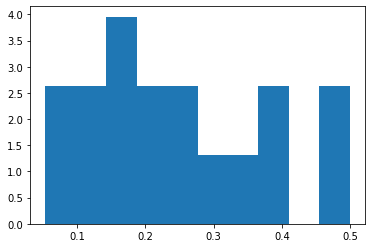

In [595]:
g = treatment_k_fold_fit_and_predict(make_g_model, X=confounders, A=treatment, n_splits=10)
hist(g, density=True)

In [596]:
Q0,Q1=outcome_k_fold_fit_and_predict(make_Q_model, X=confounders, y=outcome, A=treatment, n_splits=10, output_type="continuous")

In [597]:
data_and_nuisance_estimates = pd.DataFrame({'g': g, 'Q0': Q0, 'Q1': Q1, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,g,Q0,Q1,A,Y
0,0.220000,-4.921225,-5.309838,0,-0.241016
1,0.372500,-2.306381,-2.704127,0,-3.361270
2,0.479167,-1.421719,-1.826891,0,6.519808
3,0.283833,-1.845974,-1.934782,0,0.867732
4,0.250000,-1.210617,-1.479707,0,0.336956


In [598]:
def att_aiptw(Q0, Q1, g, A, Y, prob_t=None):
  """
  # Double ML estimator for the ATT
  This uses the ATT specific scores, see equation 3.9 of https://www.econstor.eu/bitstream/10419/149795/1/869216953.pdf
  """

  if prob_t is None:
    prob_t = A.mean() # estimate marginal probability of treatment

  tau_hat = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0)).mean()/ prob_t
  
  scores = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0) - tau_hat*A) / prob_t
  n = Y.shape[0] # number of observations
  std_hat = np.std(scores) / np.sqrt(n)

  return tau_hat, std_hat


In [599]:
tau_hat, std_hat = att_aiptw(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")
print(tau_hat - 1.96*std_hat, tau_hat + 1.96*std_hat )


The estimate is -2.8247878897823857 pm 7.377084595702771
-10.201872485485156 4.552296705920385


### for comparison, the point estimate without any covariate correction
outcome[treatment==1].mean()-outcome[treatment==0].mean()

# 2007

### Conditional parallel assumption for 2007 works very well 

In [736]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [737]:
panel = pd.read_csv('2007_notadd_trimmed_new.csv')
print(panel)

       stkcd  year  province_code  city_code indcd   fixed_asset  staff  \
0          2  2000         440000   440300.0   K70  3.382824e+08   6616   
1          2  2001         440000   440300.0   K70  2.883114e+08   5349   
2          2  2002         440000   440300.0   K70  3.486585e+08   6055   
3          2  2003         440000   440300.0   K70  2.680249e+08   7025   
4          2  2004         440000   440300.0   K70  2.314256e+08   9627   
...      ...   ...            ...        ...   ...           ...    ...   
7211  900949  2006         330000   330100.0   D44  6.548130e+09   3608   
7212  900950  2006         320000   320400.0   K70  3.174713e+07    480   
7213  900953  2006         310000   310000.0   C36  8.829307e+08  10588   
7214  900956  2006         420000   420200.0   C38  2.770235e+08   2951   
7215  900957  2006         310000   310000.0   E50  2.040832e+08    104   

      tfp_acf01  lninvesta   lntasset  ...  tapr_win   roa_win  leverage  age  \
0     10.454041  1

In [738]:
post_2006 = panel['year'].isin([2002, 2003, 2004, 2005, 2006])
panel['post_2006']=post_2006

In [739]:
# make post_2004 type bool
panel['post_2006'] = panel['post_2006'].astype(bool)

In [740]:
panel = panel.groupby(['stkcd', 'post_2006']).mean()
panel = panel.reset_index(level='post_2006')
panel = panel[panel.index.duplicated(keep = False)]
panel

C:\Users\wenke\AppData\Local\Temp/ipykernel_19776/2561278094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  panel = panel.groupby(['stkcd', 'post_2006']).mean()


,post_2006,year,province_code,city_code,fixed_asset,staff,tfp_acf01,lninvesta,lntasset,lntdebt,tapr_win,roa_win,leverage,age,lnclr,unempro,unemployee,second_pro,treat_2007,post_2007
stkcd,,,,,,,,,,,,,,,,,,,,
2,False,2000.0,440000.000000,440300.000000,3.382824e+08,6616.000000,10.454041,17.959246,22.449997,21.700314,0.068681,0.055347,0.472516,12.0,10.842165,1.450000,18090.000000,52.500000,0.0,0.0
2,True,2003.5,440000.000000,440300.000000,3.100239e+08,8736.500000,11.070433,17.712028,23.397914,22.857257,0.076723,0.055411,0.583896,15.5,10.487613,1.470000,23680.833333,55.923333,0.0,0.0
3,False,2000.0,440000.000000,440300.000000,6.888027e+08,5446.000000,8.216515,16.473339,21.637333,21.819565,-0.235439,-0.239998,1.199893,12.0,11.747837,1.450000,18090.000000,52.500000,0.0,0.0
3,True,2001.0,440000.000000,440300.000000,2.303519e+08,2941.000000,6.390524,11.043571,20.915489,21.514290,0.009506,0.009506,1.819934,13.0,11.268627,1.470000,19378.000000,54.060001,0.0,0.0
6,False,2000.0,440000.000000,440300.000000,2.736611e+08,84.000000,12.202032,17.696901,22.055054,21.649057,0.042575,0.036034,0.666313,11.0,14.996585,1.450000,18090.000000,52.500000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600897,True,2003.5,350000.000000,350200.000000,8.527947e+08,526.000000,8.757021,16.381639,20.998309,18.012078,0.069003,0.058437,0.055613,7.5,14.309287,1.398333,20360.833333,55.923333,0.0,0.0
600898,False,2000.0,410000.000000,410100.000000,2.718247e+08,1496.000000,9.383664,14.956790,20.684227,21.541840,-0.053737,-0.052112,2.357521,11.0,12.110124,0.350000,21994.000000,49.200001,0.0,0.0
600898,True,2003.5,396666.666667,396766.666667,2.055554e+08,960.666667,10.627126,14.078697,20.350011,20.065836,0.050236,0.030763,1.064090,14.5,12.275023,0.871667,51755.333333,45.488333,0.0,0.0


In [741]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [742]:
# format this in a manner sympatico with ATT estimation
# compact_df contains only post_2004 data
compact_df = panel[~panel['post_2006']]

# calcuate change in TFP
lninvest = panel['lninvesta'].values
compact_df['Y1-Y0'] = lninvest[panel['post_2006']] - lninvest[~panel['post_2006']]

# reset index so we have (1,2,3..)
compact_df = compact_df.reset_index()

# set outcome to Y1-Y0
outcome = compact_df['Y1-Y0']
treatment = compact_df['treat_2007'].astype(int)
confounders = compact_df[['lntasset','lntdebt', 'tapr_win', 'roa_win', 'age', 'leverage']]
#compact_df.to_csv("compact.csv")

C:\Users\wenke\AppData\Local\Temp/ipykernel_19776/2915796256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_df['Y1-Y0'] = lninvest[panel['post_2006']] - lninvest[~panel['post_2006']]


In [743]:
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)

In [744]:
# specify a model for the conditional expected outcome

# TODO(victorveitch) the covariates have basically no predictive power, replace this example with something better

# make a function that returns a sklearn model for later use in k-folding
def make_Q_model():
    #return LinearRegression()
    return RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100, max_depth=3)
    #return XGBRegressor(n_estimators=100, n_jobs=1, random_state= RANDOM_SEED)
Q_model = make_Q_model()

# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_w_treatment = confounders.copy()
X_w_treatment["treatment"] = treatment

X_train, X_test, y_train, y_test = train_test_split(X_w_treatment, outcome, test_size=0.2)
Q_model.fit(X_train, y_train)
y_pred = Q_model.predict(X_test)

test_mse=mean_squared_error(y_pred, y_test)
print(f"Test MSE of fit model {test_mse}") 
baseline_mse=mean_squared_error(y_train.mean()*np.ones_like(y_test), y_test)
print(f"Test MSE of no-covariate model {baseline_mse}")

Test MSE of fit model 2.3370481913728476
Test MSE of no-covariate model 2.198305121780191


In [745]:
# specify a model for the propensity score

def make_g_model():
 
  return RandomForestClassifier(n_estimators=100, max_depth=3, random_state = RANDOM_SEED)
 #return RandomForestClassifier(n_estimators=100, max_depth=3)

g_model = make_g_model()
# Sanity check that chosen model actually improves test error
# A real analysis should give substantial attention to model selection and validation 

X_train, X_test, a_train, a_test = train_test_split(confounders, treatment, test_size=0.2)
g_model.fit(X_train, a_train)
a_pred = g_model.predict_proba(X_test)[:,1]

test_ce=log_loss(a_test, a_pred)
print(f"Test CE of fit model {test_ce}") 
baseline_ce=log_loss(a_test, a_train.mean()*np.ones_like(a_test))
print(f"Test CE of no-covariate model {baseline_ce}")

Test CE of fit model 0.36455836279723197
Test CE of no-covariate model 0.36742915508332114


In [746]:
def treatment_k_fold_fit_and_predict(make_model, X:pd.DataFrame, A:np.array, n_splits:int):
    """
    Implements K fold cross-fitting for the model predicting the treatment A. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns an array containing the predictions  

    Args:
    model: function that returns sklearn model (which implements fit and predict_prob)
    X: dataframe of variables to adjust for
    A: array of treatments
    n_splits: number of splits to use
    """
    predictions = np.full_like(A, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    
    for train_index, test_index in kf.split(X, A):
      X_train = X.loc[train_index]
      A_train = A.loc[train_index]
      g = make_model()
      g.fit(X_train, A_train)

      # get predictions for split
      predictions[test_index] = g.predict_proba(X.loc[test_index])[:, 1]

    assert np.isnan(predictions).sum() == 0
    return predictions


def outcome_k_fold_fit_and_predict(make_model, X:pd.DataFrame, y:np.array, A:np.array, n_splits:int, output_type:str):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y. 
    That is, 
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated  

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    y: array of outcomes
    A: array of treatments
    n_splits: number of splits to use
    output_type: type of outcome, "binary" or "continuous"

    """
    predictions0 = np.full_like(A, np.nan, dtype=float)
    predictions1 = np.full_like(y, np.nan, dtype=float)
    if output_type == 'binary':
      kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    elif output_type == 'continuous':
      kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_w_treatment = X.copy()
    X_w_treatment["A"] = A

    # for predicting effect under treatment / control status for each data point 
    X0 = X_w_treatment.copy()
    X0["A"] = 0
    X1 = X_w_treatment.copy()
    X1["A"] = 1

    
    for train_index, test_index in kf.split(X_w_treatment, y):
      X_train = X_w_treatment.loc[train_index]
      y_train = y.loc[train_index]
      q = make_model()
      q.fit(X_train, y_train)

      if output_type =='binary':
        predictions0[test_index] = q.predict_proba(X0.loc[test_index])[:, 1]
        predictions1[test_index] = q.predict_proba(X1.loc[test_index])[:, 1]
      elif output_type == 'continuous':
        predictions0[test_index] = q.predict(X0.loc[test_index])
        predictions1[test_index] = q.predict(X1.loc[test_index])

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

(array([ 5.81148083, 14.45544812, 10.74391414,  5.95798875,  2.63714256,
         0.48835973,  0.29301584,  0.14650792,  0.04883597,  0.04883597]),
 array([0.02396833, 0.04857976, 0.07319119, 0.09780261, 0.12241404,
        0.14702547, 0.1716369 , 0.19624833, 0.22085976, 0.24547119,
        0.27008262]),
 <BarContainer object of 10 artists>)

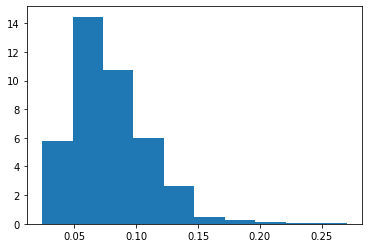

In [747]:
g = treatment_k_fold_fit_and_predict(make_g_model, X=confounders, A=treatment, n_splits=10)
hist(g, density=True)

In [748]:
Q0,Q1=outcome_k_fold_fit_and_predict(make_Q_model, X=confounders, y=outcome, A=treatment, n_splits=10, output_type="continuous")

In [749]:
data_and_nuisance_estimates = pd.DataFrame({'g': g, 'Q0': Q0, 'Q1': Q1, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,g,Q0,Q1,A,Y
0,0.038036,0.233986,0.312098,0,-0.247218
1,0.072424,0.110884,0.164938,0,-5.429768
2,0.060809,0.135994,0.160629,0,0.480714
3,0.027930,0.443466,0.448955,0,2.808968
4,0.043499,0.279401,0.297175,0,-2.940610


In [750]:
def att_aiptw(Q0, Q1, g, A, Y, prob_t=None):
  """
  # Double ML estimator for the ATT
  This uses the ATT specific scores, see equation 3.9 of https://www.econstor.eu/bitstream/10419/149795/1/869216953.pdf
  """

  if prob_t is None:
    prob_t = A.mean() # estimate marginal probability of treatment

  tau_hat = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0)).mean()/ prob_t
  
  scores = (A*(Y-Q0) - (1-A)*(g/(1-g))*(Y-Q0) - tau_hat*A) / prob_t
  n = Y.shape[0] # number of observations
  std_hat = np.std(scores) / np.sqrt(n)

  return tau_hat, std_hat


In [751]:
tau_hat, std_hat = att_aiptw(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")
print(tau_hat - 1.96*std_hat, tau_hat + 1.96*std_hat)

The estimate is 0.4169354457180887 pm 0.37651424290351004
0.04042120281457867 0.7934496886215987
